In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

import scipy
import numpy as np
import warnings

In [2]:
df=pd.read_csv(r"C:\Users\Hamza\Downloads\Simsy-data.csv",encoding="latin1")

In [3]:
df.head()

,BMC step type,Completed,Problem confident,Problem confident score,Problem current progress,Problem current progress score,Problem ideas,Problem level support,Problem level support score,Problem rate,Creator,unique id
0,PROBLEM,NaN,NaN,NaN,NaN,NaN,done step 1,NaN,NaN,4.0,www.s.i.dofficial+55@gmail.com,1682063757581x960241337117179900
1,EXISTING ALTERNATIVES,NaN,NaN,NaN,NaN,NaN,done step 2,NaN,NaN,5.0,www.s.i.dofficial+55@gmail.com,1682064257801x267360997770002430
2,KEY METRICS,NaN,Very Poor,NaN,In progress - 40%,NaN,test step 4,Moderate support required,NaN,3.0,www.s.i.dofficial+55@gmail.com,1682064288721x724364634571669500
3,HIGH LEVEL CONCEPT,NaN,Very Good,NaN,Almost complete - 80%,NaN,6,No support required,NaN,3.0,www.s.i.dofficial+55@gmail.com,1682064294109x619713855416172500
4,UNFAIR ADVANTAGE,NaN,Good,NaN,Halfway done - 60%,NaN,test 7,Significant support required,NaN,3.0,www.s.i.dofficial+55@gmail.com,1682064297265x673246669811220500


In [4]:
df=df[["BMC step type","Problem confident","Problem current progress","Problem ideas","Problem level support","Problem rate","Creator"]]

In [5]:
df.head()

,BMC step type,Problem confident,Problem current progress,Problem ideas,Problem level support,Problem rate,Creator
0,PROBLEM,NaN,NaN,done step 1,NaN,4.0,www.s.i.dofficial+55@gmail.com
1,EXISTING ALTERNATIVES,NaN,NaN,done step 2,NaN,5.0,www.s.i.dofficial+55@gmail.com
2,KEY METRICS,Very Poor,In progress - 40%,test step 4,Moderate support required,3.0,www.s.i.dofficial+55@gmail.com
3,HIGH LEVEL CONCEPT,Very Good,Almost complete - 80%,6,No support required,3.0,www.s.i.dofficial+55@gmail.com
4,UNFAIR ADVANTAGE,Good,Halfway done - 60%,test 7,Significant support required,3.0,www.s.i.dofficial+55@gmail.com


In [6]:
df.dtypes

BMC step type                object
Problem confident            object
Problem current progress     object
Problem ideas                object
Problem level support        object
Problem rate                float64
Creator                      object
dtype: object

In [7]:
df.isnull().sum()

BMC step type               351
Problem confident           433
Problem current progress    433
Problem ideas               164
Problem level support       431
Problem rate                351
Creator                     351
dtype: int64

In [8]:
df.shape

(1102, 7)

In [9]:
df1=df.dropna()

In [10]:
df1.isnull().sum()

BMC step type               0
Problem confident           0
Problem current progress    0
Problem ideas               0
Problem level support       0
Problem rate                0
Creator                     0
dtype: int64

In [11]:
df1.columns

Index(['BMC step type', 'Problem confident', 'Problem current progress',
       'Problem ideas', 'Problem level support', 'Problem rate', 'Creator'],
      dtype='object')

In [12]:
df1["BMC step type"].unique()

array(['KEY METRICS', 'HIGH LEVEL CONCEPT', 'UNFAIR ADVANTAGE',
       'REVENUE STREAMS', 'SOLUTION', 'UNIQUE VALUE PROPOSITION',
       'EXISTING ALTERNATIVES', 'CHANNELS', 'CUSTOMER SEGMENTS',
       'EARLY ADOPTERS', 'COST STRUCTURE', 'PROBLEM'], dtype=object)

In [13]:
df1["Problem confident"].unique()

array(['Very Poor', 'Very Good', 'Good', 'Poor', 'Fair', 'Excellent'],
      dtype=object)

In [14]:
df1["Problem current progress"].unique()

array(['In progress - 40%', 'Almost complete - 80%', 'Halfway done - 60%',
       'Planning - 20%', 'Completed - 100%', 'Not started - 0%'],
      dtype=object)

In [15]:
df1["Problem ideas"].shape

(532,)

In [16]:
len(df1["Problem ideas"].unique())

188

In [17]:
df1.head()

,BMC step type,Problem confident,Problem current progress,Problem ideas,Problem level support,Problem rate,Creator
2,KEY METRICS,Very Poor,In progress - 40%,test step 4,Moderate support required,3.0,www.s.i.dofficial+55@gmail.com
3,HIGH LEVEL CONCEPT,Very Good,Almost complete - 80%,6,No support required,3.0,www.s.i.dofficial+55@gmail.com
4,UNFAIR ADVANTAGE,Good,Halfway done - 60%,test 7,Significant support required,3.0,www.s.i.dofficial+55@gmail.com
9,REVENUE STREAMS,Poor,Planning - 20%,test,Full support required,3.0,www.s.i.dofficial+55@gmail.com
10,SOLUTION,Poor,Planning - 20%,done test step 3,No support required,4.0,www.s.i.dofficial+54@gmail.com


In [18]:
df1.shape

(532, 7)

In [19]:
df1["Problem level support"].unique()

array(['Moderate support required', 'No support required',
       'Significant support required', 'Full support required',
       'Minimal support required', 'Some support required'], dtype=object)

In [20]:
df1["Problem rate"].unique()

array([3. , 4. , 5. , 0. , 2. , 1. , 3.5, 4.5, 2.5, 1.5])

In [21]:
df1["Creator"].unique()

array(['www.s.i.dofficial+55@gmail.com', 'www.s.i.dofficial+54@gmail.com',
       'www.s.i.dofficial+45@gmail.com', 'me@sreedhartruly.com',
       'www.s.i.dofficial+53@gmail.com', 'aditya+5@glocalists.com',
       'maluraditya+17@gmail.com', 'www.s.i.dofficial+29@gmail.com',
       'siddhesh+60@glocalists.com', 'aditya+3@glocalists.com',
       '(deleted thing)', 'siddhesh+55@glocalists.com',
       'siddhesh+2@simsy.io', 'bs@simsyventures.com',
       'sreedhar.truly+2@gmail.com', 'sreedhar.truly+6@gmail.com',
       'aditya+4@simsy.io', 'aditya+8@simsy.io', 'siddhesh+4@simsy.io',
       'aditya+6@simsy.io', 'aditya+11@simsy.io', 'aditya+80@simsy.io',
       'aditya@simsy.io', 'aditya+85@simsy.io', 'karthik@simsy.io',
       'aditya+62@simsy.io', 'aparnaswathi80@gmail.com',
       'mukeshguptachintu+1@gmail.com', 'siddhesh+20@simsy.io',
       'siddhesh+21@simsy.io', 'sharanya@simsy.io',
       'siddhesh+30@simsy.io', 'aditya+5@simsy.io', 'aditya+82@simsy.io'],
      dtype=object)

In [22]:
df1[df1["Creator"]=="www.s.i.dofficial+55@gmail.com"].shape

(46, 7)

In [23]:
df1.drop("Problem ideas",axis=1,inplace=True)

C:\Users\Hamza\AppData\Local\Temp\ipykernel_23704\3443397656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop("Problem ideas",axis=1,inplace=True)


In [24]:
df1

,BMC step type,Problem confident,Problem current progress,Problem level support,Problem rate,Creator
2,KEY METRICS,Very Poor,In progress - 40%,Moderate support required,3.0,www.s.i.dofficial+55@gmail.com
3,HIGH LEVEL CONCEPT,Very Good,Almost complete - 80%,No support required,3.0,www.s.i.dofficial+55@gmail.com
4,UNFAIR ADVANTAGE,Good,Halfway done - 60%,Significant support required,3.0,www.s.i.dofficial+55@gmail.com
9,REVENUE STREAMS,Poor,Planning - 20%,Full support required,3.0,www.s.i.dofficial+55@gmail.com
10,SOLUTION,Poor,Planning - 20%,No support required,4.0,www.s.i.dofficial+54@gmail.com
...,...,...,...,...,...,...
980,CHANNELS,Poor,Planning - 20%,Minimal support required,0.0,aditya@simsy.io
981,CUSTOMER SEGMENTS,Poor,Planning - 20%,No support required,0.0,aditya@simsy.io
982,EARLY ADOPTERS,Poor,In progress - 40%,Significant support required,0.0,aditya@simsy.io
983,COST STRUCTURE,Fair,Planning - 20%,Minimal support required,0.0,aditya@simsy.io


In [25]:
df1=df1.reset_index(drop=True)

In [26]:
df1

,BMC step type,Problem confident,Problem current progress,Problem level support,Problem rate,Creator
0,KEY METRICS,Very Poor,In progress - 40%,Moderate support required,3.0,www.s.i.dofficial+55@gmail.com
1,HIGH LEVEL CONCEPT,Very Good,Almost complete - 80%,No support required,3.0,www.s.i.dofficial+55@gmail.com
2,UNFAIR ADVANTAGE,Good,Halfway done - 60%,Significant support required,3.0,www.s.i.dofficial+55@gmail.com
3,REVENUE STREAMS,Poor,Planning - 20%,Full support required,3.0,www.s.i.dofficial+55@gmail.com
4,SOLUTION,Poor,Planning - 20%,No support required,4.0,www.s.i.dofficial+54@gmail.com
...,...,...,...,...,...,...
527,CHANNELS,Poor,Planning - 20%,Minimal support required,0.0,aditya@simsy.io
528,CUSTOMER SEGMENTS,Poor,Planning - 20%,No support required,0.0,aditya@simsy.io
529,EARLY ADOPTERS,Poor,In progress - 40%,Significant support required,0.0,aditya@simsy.io
530,COST STRUCTURE,Fair,Planning - 20%,Minimal support required,0.0,aditya@simsy.io


In [27]:
input_data = {
    'BMC step type': ["CHANNELS"],
    'Problem confident': ["Good"],
    'Problem current progress': ["In progress - 40%"],
    'Problem level support':["Significant support required"],
    'Problem rate': [3],  
    'Creator': ["aditya+80@simsy.io"]
}
input_df=pd.DataFrame(input_data)

In [28]:
combined_df = pd.concat([df1, input_df], ignore_index=True)

In [29]:
combined_df.tail()

,BMC step type,Problem confident,Problem current progress,Problem level support,Problem rate,Creator
528,CUSTOMER SEGMENTS,Poor,Planning - 20%,No support required,0.0,aditya@simsy.io
529,EARLY ADOPTERS,Poor,In progress - 40%,Significant support required,0.0,aditya@simsy.io
530,COST STRUCTURE,Fair,Planning - 20%,Minimal support required,0.0,aditya@simsy.io
531,REVENUE STREAMS,Poor,Planning - 20%,Minimal support required,0.0,aditya@simsy.io
532,CHANNELS,Good,In progress - 40%,Significant support required,3.0,aditya+80@simsy.io


In [30]:
cat_columns = ['BMC step type', 'Problem confident', 'Problem current progress', 'Problem level support']

one_hot_encoded = pd.get_dummies(combined_df[cat_columns])


In [31]:
one_hot_encoded.shape

(533, 30)

In [32]:
combined_data = pd.concat([one_hot_encoded, combined_df[['Problem rate']]], axis=1)


In [33]:
combined_data

,BMC step type_CHANNELS,BMC step type_COST STRUCTURE,BMC step type_CUSTOMER SEGMENTS,BMC step type_EARLY ADOPTERS,BMC step type_EXISTING ALTERNATIVES,BMC step type_HIGH LEVEL CONCEPT,BMC step type_KEY METRICS,BMC step type_PROBLEM,BMC step type_REVENUE STREAMS,BMC step type_SOLUTION,...,Problem current progress_In progress - 40%,Problem current progress_Not started - 0%,Problem current progress_Planning - 20%,Problem level support_Full support required,Problem level support_Minimal support required,Problem level support_Moderate support required,Problem level support_No support required,Problem level support_Significant support required,Problem level support_Some support required,Problem rate
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,3.0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3.0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,3.0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0.0
529,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0.0
530,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0.0
531,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0.0


In [34]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_data)

In [35]:
scaled_data

array([[-0.29623488, -0.28097574, -0.28867513, ..., -0.4416642 ,
        -0.46869994,  0.20283925],
       [-0.29623488, -0.28097574, -0.28867513, ..., -0.4416642 ,
        -0.46869994,  0.20283925],
       [-0.29623488, -0.28097574, -0.28867513, ...,  2.26416359,
        -0.46869994,  0.20283925],
       ...,
       [-0.29623488,  3.55902608, -0.28867513, ..., -0.4416642 ,
        -0.46869994, -1.540924  ],
       [-0.29623488, -0.28097574, -0.28867513, ..., -0.4416642 ,
        -0.46869994, -1.540924  ],
       [ 3.37569976, -0.28097574, -0.28867513, ...,  2.26416359,
        -0.46869994,  0.20283925]])

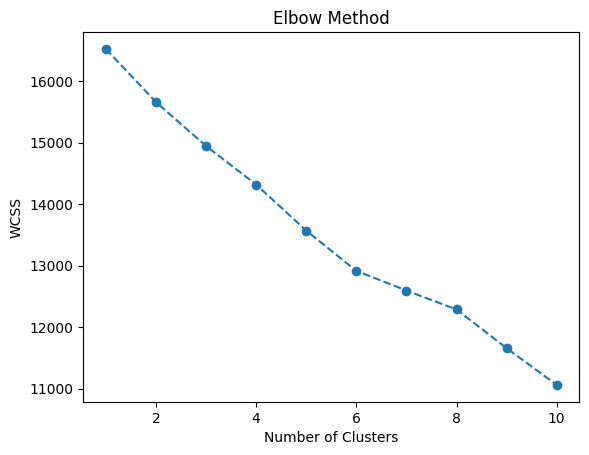

In [36]:
warnings.filterwarnings(action='ignore')
wcss = []
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
num_clusters = 10  
numerical_data=scaled_data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(numerical_data)

In [38]:
cluster_labels

array([3, 8, 6, 0, 5, 8, 0, 9, 5, 3, 8, 6, 1, 8, 7, 2, 0, 4, 9, 5, 3, 8,
       8, 6, 1, 8, 7, 0, 8, 6, 1, 8, 7, 2, 4, 9, 5, 3, 8, 8, 6, 1, 8, 7,
       2, 0, 0, 1, 8, 4, 9, 5, 3, 8, 8, 6, 1, 8, 7, 4, 9, 5, 3, 8, 8, 6,
       1, 4, 5, 4, 9, 5, 3, 8, 8, 6, 8, 7, 2, 0, 2, 9, 9, 5, 5, 3, 8, 8,
       6, 1, 8, 7, 2, 0, 4, 9, 5, 3, 8, 8, 6, 1, 8, 7, 2, 0, 4, 9, 5, 3,
       8, 8, 6, 4, 9, 3, 8, 8, 6, 1, 8, 7, 2, 0, 4, 9, 5, 3, 8, 8, 6, 1,
       8, 7, 2, 0, 4, 4, 9, 5, 3, 8, 8, 6, 4, 9, 5, 3, 8, 8, 6, 1, 8, 7,
       2, 0, 4, 9, 5, 3, 8, 8, 6, 1, 8, 7, 2, 0, 4, 9, 5, 3, 8, 8, 4, 9,
       5, 3, 8, 4, 9, 5, 3, 8, 8, 6, 1, 8, 7, 2, 0, 4, 9, 5, 3, 8, 8, 6,
       1, 8, 7, 2, 0, 4, 9, 5, 3, 8, 8, 6, 1, 8, 7, 2, 0, 4, 9, 5, 3, 8,
       8, 6, 1, 8, 7, 2, 0, 4, 9, 5, 3, 8, 8, 6, 1, 8, 7, 2, 0, 4, 9, 5,
       3, 8, 8, 6, 1, 8, 7, 2, 0, 4, 9, 5, 3, 8, 8, 6, 1, 8, 7, 2, 0, 4,
       9, 5, 3, 8, 8, 6, 1, 8, 7, 2, 0, 4, 9, 5, 3, 8, 8, 6, 1, 8, 7, 2,
       0, 4, 9, 5, 3, 8, 8, 6, 1, 8, 7, 2, 0, 4, 9,

In [39]:
input_cluster = cluster_labels[-1]
similar_indices = [i for i, label in enumerate(cluster_labels) if label == input_cluster]

In [40]:
similarities = cosine_similarity(numerical_data[-1].reshape(1, -1), numerical_data[similar_indices])

In [41]:
most_similar_index = similar_indices[similarities.argmax()]

most_similar_row = df1.iloc[most_similar_index]

print("Most similar row:")
print(most_similar_row)

Most similar row:
BMC step type                                   CHANNELS
Problem confident                                   Good
Problem current progress               In progress - 40%
Problem level support       Significant support required
Problem rate                                         3.0
Creator                                aditya+6@simsy.io
Name: 306, dtype: object
